# Final Project

In [50]:
import numpy as np
import pandas as pd

In [51]:
data = pd.read_csv('master.csv')
data['Version Release Date'] = pd.to_datetime(data['Version Release Date'])
data.head()

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
0,Claude 2,2023-07-11,GPQA diamond,0.346591,Anthropic,United States of America
1,Claude 2,2023-07-11,MATH level 5,0.117258,Anthropic,United States of America
2,Claude 2.1,2023-11-21,GPQA diamond,0.329545,Anthropic,United States of America
3,Claude 3.5 Sonnet,2024-06-20,GPQA diamond,0.540404,Anthropic,United States of America
4,Claude 3.5 Sonnet,2024-06-20,MATH level 5,0.516805,Anthropic,United States of America


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Model Name            326 non-null    object        
 1   Version Release Date  326 non-null    datetime64[ns]
 2   Benchmark             326 non-null    object        
 3   Benchmark Score       326 non-null    float64       
 4   Organization          326 non-null    object        
 5   Country               326 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 15.4+ KB


## What AI is best at tasks?
### Using the benchmark tests and their respective scores, we can evaluate how each AI performs in certain categories of production.

## The first benchmark to look at is MATH level 5
### It is a challenging mathematical subset of questions aimed to evaluate how proficient AI is at processing mathematical equations.

In [53]:
math = data.loc[data['Benchmark'] == "MATH level 5"]
math.head()

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
1,Claude 2,2023-07-11,MATH level 5,0.117258,Anthropic,United States of America
4,Claude 3.5 Sonnet,2024-06-20,MATH level 5,0.516805,Anthropic,United States of America
6,Claude 3.5 Sonnet,2024-10-22,MATH level 5,0.569486,Anthropic,United States of America
8,Claude 3 Haiku,2024-03-07,MATH level 5,0.148792,Anthropic,United States of America
10,Claude 3 Opus,2024-02-29,MATH level 5,0.374811,Anthropic,United States of America


In [54]:
math.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 1 to 316
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Model Name            92 non-null     object        
 1   Version Release Date  92 non-null     datetime64[ns]
 2   Benchmark             92 non-null     object        
 3   Benchmark Score       92 non-null     float64       
 4   Organization          92 non-null     object        
 5   Country               92 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.0+ KB


In [55]:
math['Benchmark Score'].describe(percentiles=[.25, .5, .75, .9])

count    92.000000
mean      0.499394
std       0.296383
min       0.032855
25%       0.229466
50%       0.497734
75%       0.763170
90%       0.900170
max       0.978285
Name: Benchmark Score, dtype: float64

### Distribution of Benchmark Scores

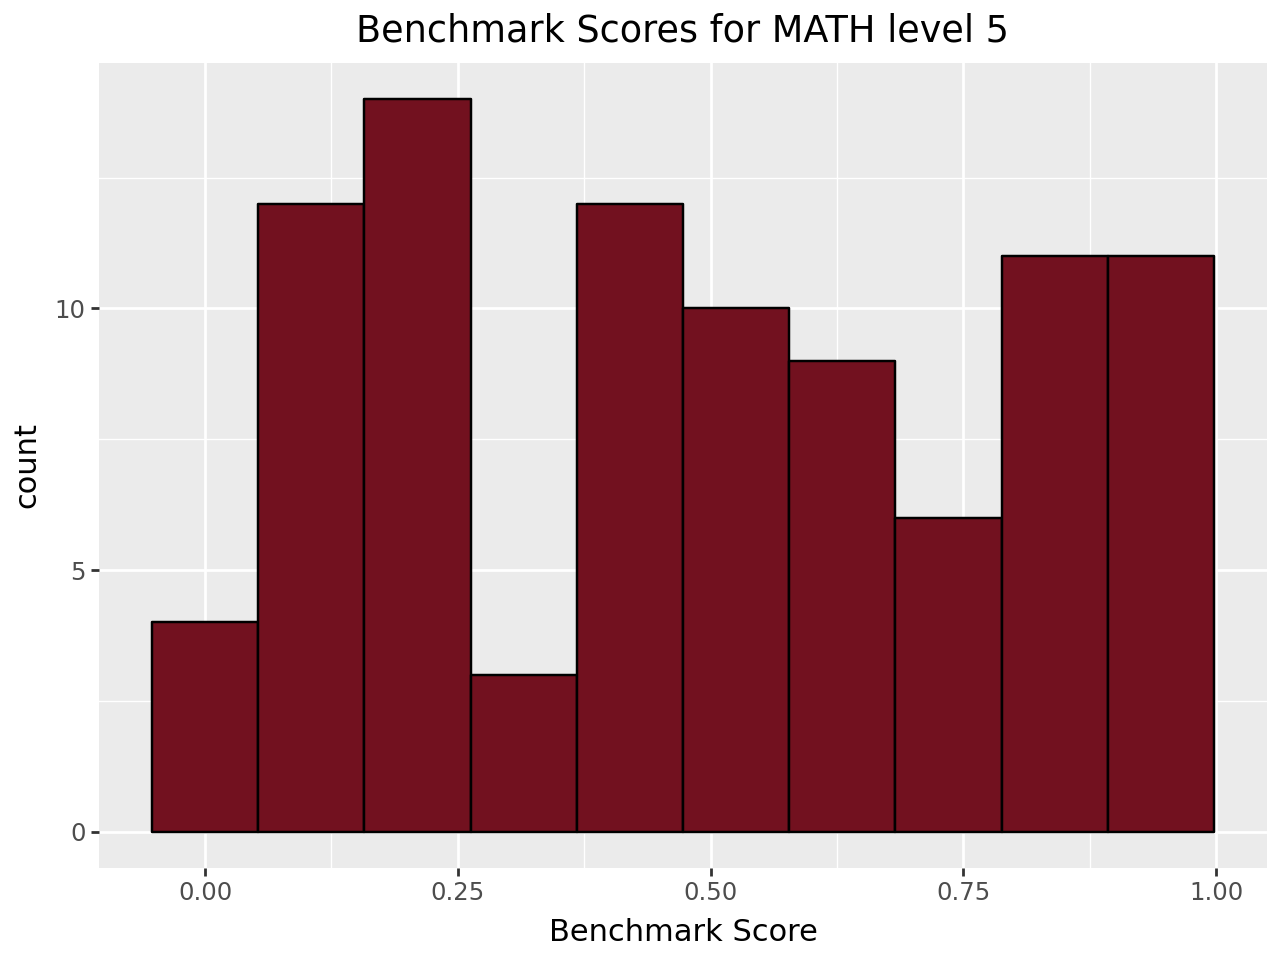

In [56]:
from plotnine import ggplot, aes, geom_histogram, geom_density, labs

ggplot(math) + aes(x="Benchmark Score") + geom_histogram(bins=10, fill="#72111F", color="black") + labs(title='Benchmark Scores for MATH level 5')

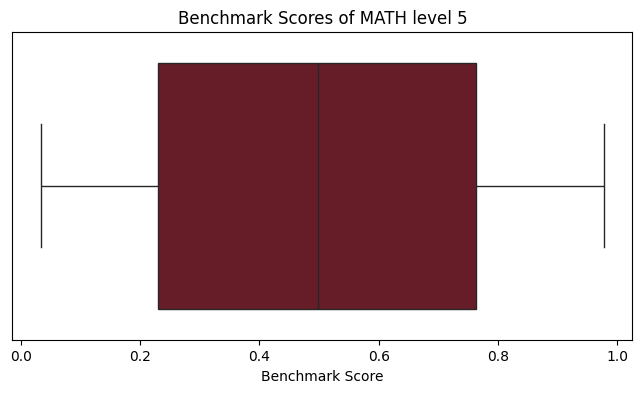

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=math['Benchmark Score'], color="#72111F")

plt.ylabel('')
plt.gca().set_yticks([])  
plt.gca().set_yticklabels([])  
plt.title('Benchmark Scores of MATH level 5')

plt.show()

Nearly perfect distribution in the describtive statistics and the boxplot. The histogram shows normal distribution with large drop-offs near 0.25 and 0.75. 

### Scatter Plot of the Benchmark Scores

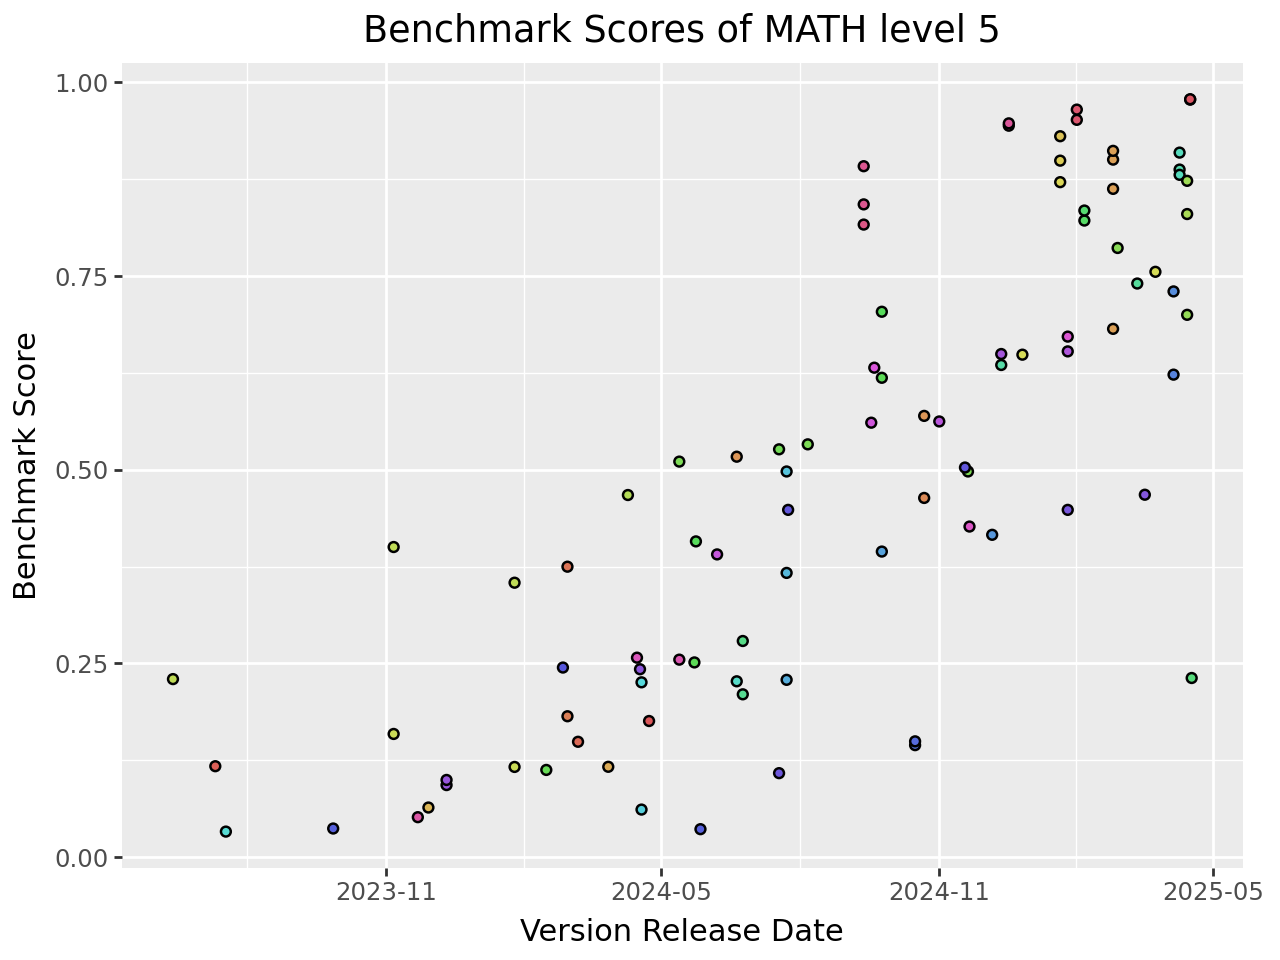

In [58]:
from plotnine import ggplot, geom_point, aes, theme, scale_x_datetime, labs

ggplot(math) + aes(x = 'Version Release Date', y = 'Benchmark Score', fill = 'Model Name') + geom_point() + theme(legend_position='none') + scale_x_datetime(date_breaks="6 months", date_labels="%Y-%m") + labs(title='Benchmark Scores of MATH level 5')

The benchmark scores follow a positive exponential regression line. This is encouraging as we look to improve on technology as we advance in time.

In [70]:
math_avg = math.groupby(['Model Name', 'Organization'])['Benchmark Score'].mean().reset_index()
math5 = math_avg.nlargest(5, 'Benchmark Score')
math5 = math5.sort_values(by='Benchmark Score', ascending=True)
math5['Model Name'] = pd.Categorical(math5['Model Name'], categories=math5['Model Name'], ordered=True)
math5

,Model Name,Organization,Benchmark Score
9,DeepSeek-R1,DeepSeek,0.930514
66,o1,OpenAI,0.945619
70,o3-mini,OpenAI,0.958270
69,o3,OpenAI,0.977719
71,o4-mini,OpenAI,0.978285


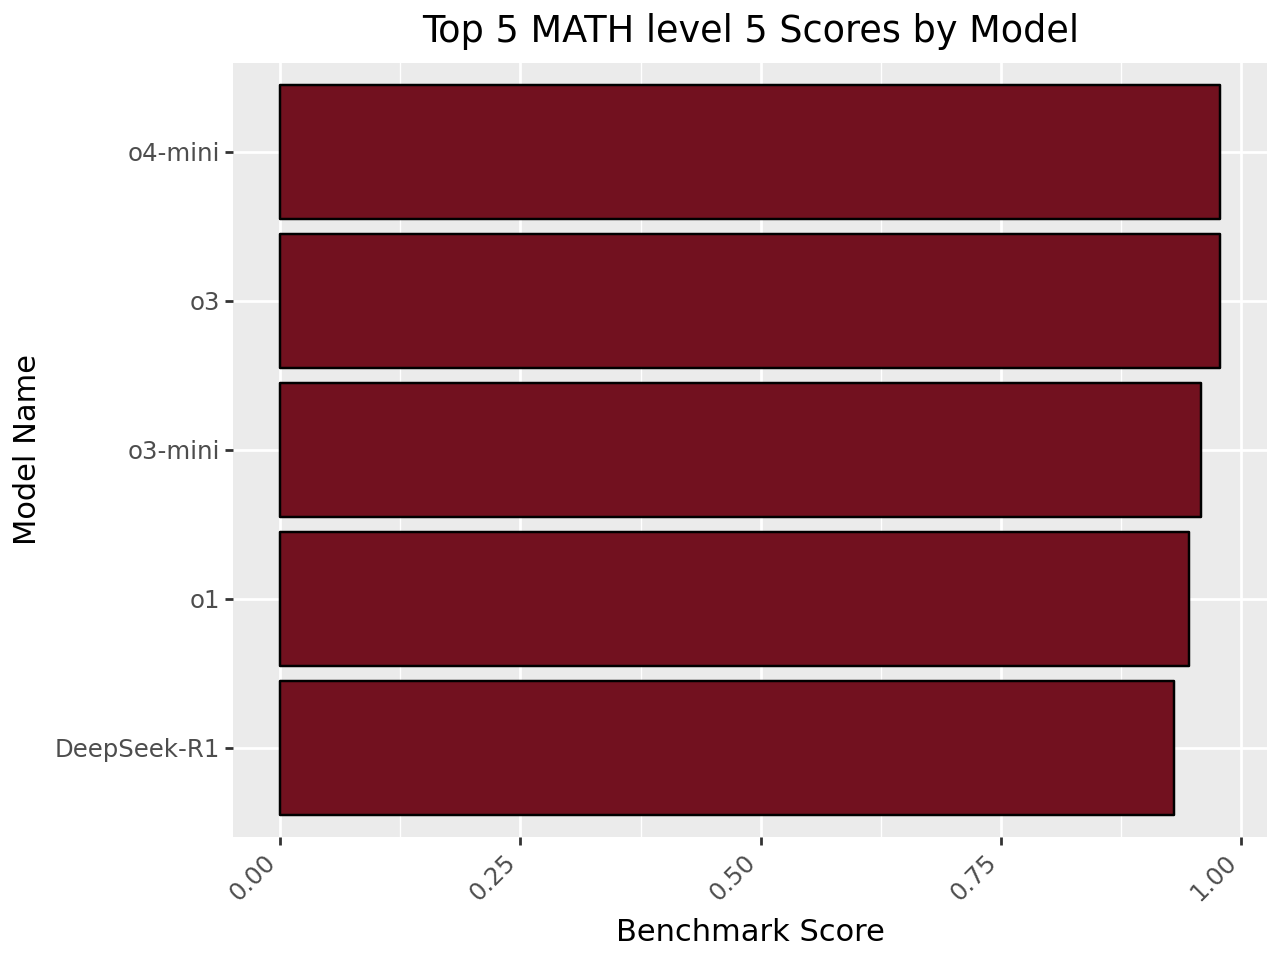

In [71]:
from plotnine import ggplot, aes, geom_bar, theme, element_text, coord_flip

ggplot(math5) + aes(x="Model Name", y="Benchmark Score") + geom_bar(stat="identity", fill="#72111F", color="black") + theme(axis_text_x=element_text(angle=45, hjust=1)) + labs(title='Top 5 MATH level 5 Scores by Model') + coord_flip()

In [66]:
org_math = math.groupby('Organization')['Benchmark Score'].mean().reset_index()
org_math = org_math.sort_values(by='Benchmark Score', ascending=True)
org_math['Organization'] = pd.Categorical(org_math['Organization'], categories=org_math['Organization'], ordered=True)
org_math

,Organization,Benchmark Score
4,Databricks,0.116503
0,01.AI,0.187878
3,Arcee AI,0.226869
9,Mistral AI,0.232403
7,Meta AI,0.357619
8,Microsoft,0.412481
11,University of Washington,0.426643
6,Google,0.473677
2,Anthropic,0.520796
1,Alibaba,0.578330


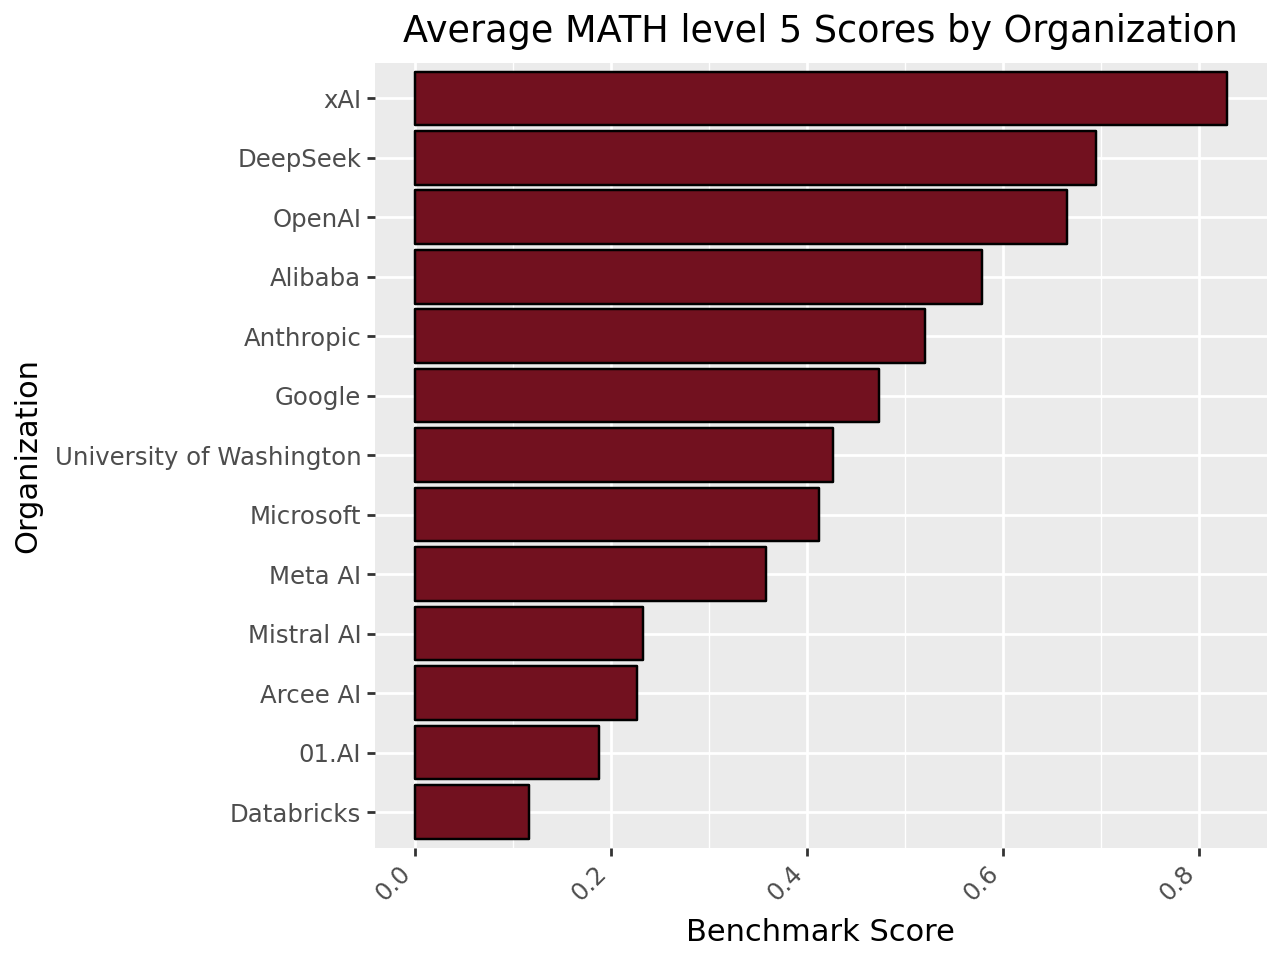

In [63]:
from plotnine import ggplot, aes, geom_bar, theme, element_text, coord_flip

ggplot(org_math) + aes(x="Organization", y="Benchmark Score") + geom_bar(stat="identity", fill="#72111F", color="black") + theme(axis_text_x=element_text(angle=45, hjust=1)) + labs(title='Average MATH level 5 Scores by Organization') +coord_flip()

The organization with the highest average score is xAI. This is interesting due to OpenAI sweeping the top 4 scores for models while only being the third highest average organization. This can be explained by the amount of models OpenAI has created over time. DeepSeek has a higher organization average than OpenAI, but only one model in the top 5.

## The first benchmark to look at is GPQA Diamond
### It is a biology, physics, and chemistry multiple choice set. These questions are designed to be at the level of a graduate student.

In [72]:
gpqa = data.loc[data['Benchmark'] == "GPQA diamond"]
gpqa.head()

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
0,Claude 2,2023-07-11,GPQA diamond,0.346591,Anthropic,United States of America
2,Claude 2.1,2023-11-21,GPQA diamond,0.329545,Anthropic,United States of America
3,Claude 3.5 Sonnet,2024-06-20,GPQA diamond,0.540404,Anthropic,United States of America
5,Claude 3.5 Sonnet,2024-10-22,GPQA diamond,0.553030,Anthropic,United States of America
7,Claude 3 Haiku,2024-03-07,GPQA diamond,0.363005,Anthropic,United States of America


In [73]:
gpqa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 314
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Model Name            99 non-null     object        
 1   Version Release Date  99 non-null     datetime64[ns]
 2   Benchmark             99 non-null     object        
 3   Benchmark Score       99 non-null     float64       
 4   Organization          99 non-null     object        
 5   Country               99 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.4+ KB


In [74]:
gpqa['Benchmark Score'].describe()

count    99.000000
mean      0.473498
std       0.172893
min       0.083965
25%       0.339331
50%       0.465909
75%       0.571496
max       0.838384
Name: Benchmark Score, dtype: float64

## Distribution of Benchmark Scores

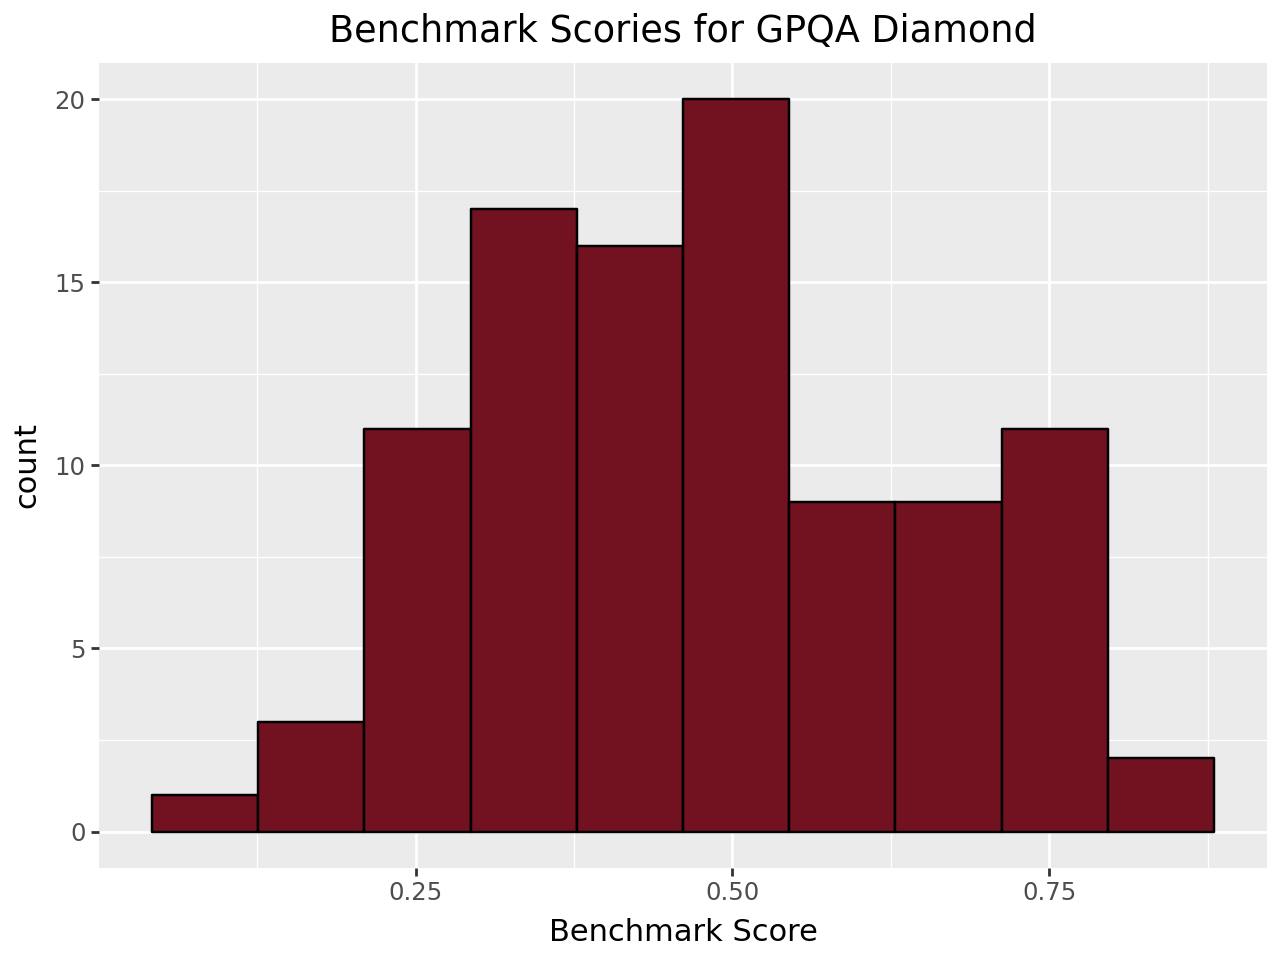

In [75]:
from plotnine import ggplot, aes, geom_histogram, geom_density, labs

ggplot(gpqa) + aes(x="Benchmark Score") + geom_histogram(bins=10, fill="#72111F", color="black") + labs(title='Benchmark Scories for GPQA Diamond')

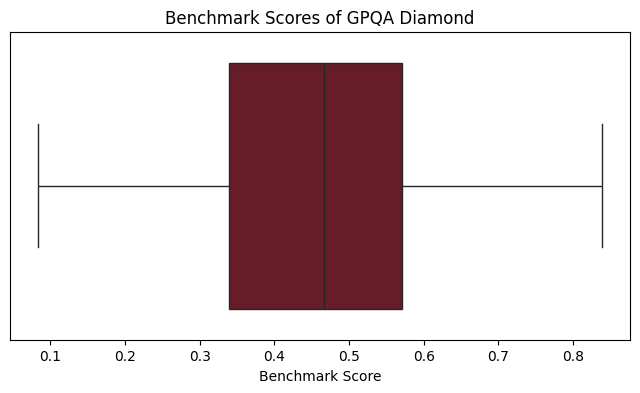

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=gpqa['Benchmark Score'], color="#72111F")

plt.ylabel('')
plt.gca().set_yticks([]) 
plt.gca().set_yticklabels([])  
plt.title('Benchmark Scores of GPQA Diamond')

plt.show()

The distribution is approximately normal. The two graphs along with the descriptive statistics tell this story. The mean and median being nearly identical shows this. The thing to identify with the distribution is that it does fall normally over the 0.47 score, therefore the scores will be slightly lower than the MATH level 5. 

## Scatter Plot for Benchmark Scores

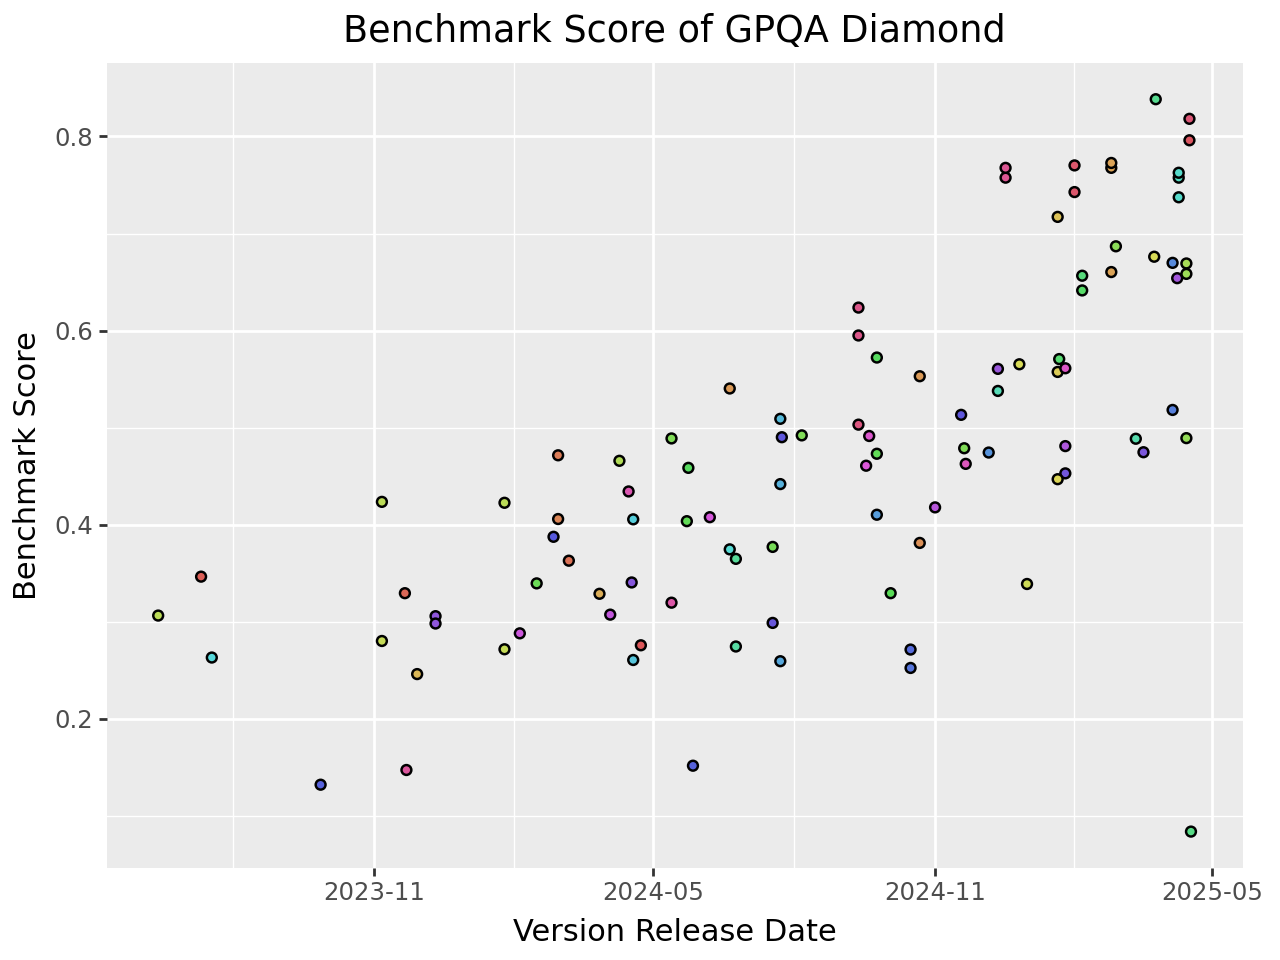

In [77]:
from plotnine import ggplot, geom_point, aes, theme, scale_x_datetime, labs

ggplot(gpqa) + aes(x = 'Version Release Date', y = 'Benchmark Score', fill = 'Model Name') + geom_point() + theme(legend_position='none') + scale_x_datetime(date_breaks="6 months", date_labels="%Y-%m") + labs(title='Benchmark Score of GPQA Diamond')

In [78]:
gpqa_avg = gpqa.groupby(['Model Name', 'Organization'])['Benchmark Score'].mean().reset_index()
gpqa5 = gpqa_avg.nlargest(5, 'Benchmark Score')
gpqa5 = gpqa5.sort_values(by='Benchmark Score', ascending=True)
gpqa5['Model Name'] = pd.Categorical(gpqa5['Model Name'], categories=gpqa5['Model Name'], ordered=True)
gpqa5

,Model Name,Organization,Benchmark Score
37,Grok-3,xAI,0.757576
74,o1,OpenAI,0.762626
79,o4-mini,OpenAI,0.796086
77,o3,OpenAI,0.818182
32,Gemini 2.5 Pro,Google,0.838384


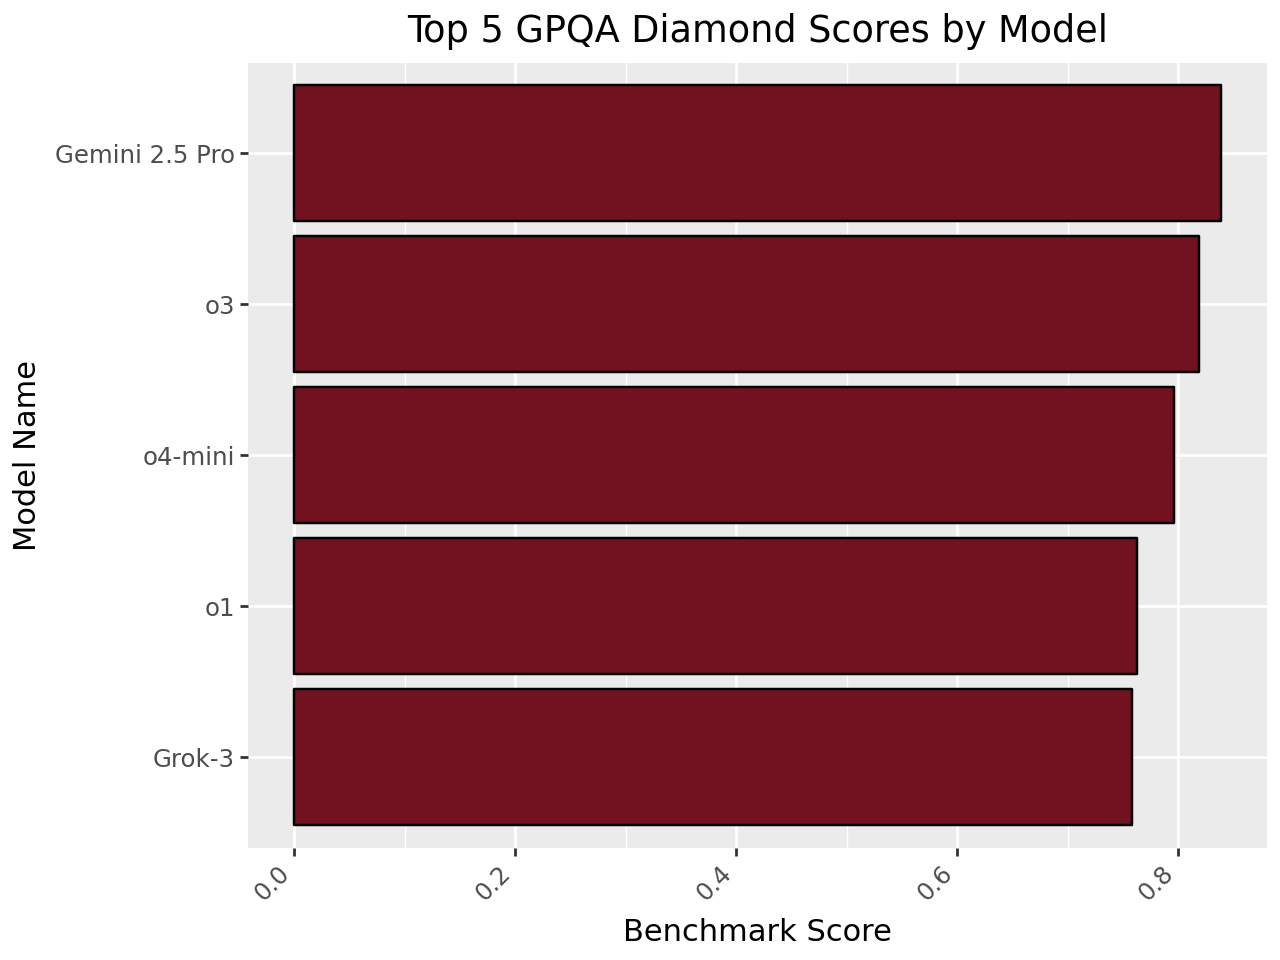

In [79]:
from plotnine import ggplot, aes, geom_bar, theme, element_text, coord_flip

ggplot(gpqa5) + aes(x="Model Name", y="Benchmark Score") + geom_bar(stat="identity", fill="#72111F", color="black") + theme(axis_text_x=element_text(angle=45, hjust=1)) + labs(title='Top 5 GPQA Diamond Scores by Model') + coord_flip()

In [80]:
org_gpqa = gpqa.groupby('Organization')['Benchmark Score'].mean().reset_index()
org_gpqa = org_gpqa.sort_values(by='Benchmark Score', ascending=True)
org_gpqa['Organization'] = pd.Categorical(org_gpqa['Organization'], categories=org_gpqa['Organization'], ordered=True)
org_gpqa

,Organization,Benchmark Score
0,01.AI,0.300505
5,Databricks,0.328914
10,Mistral AI,0.336199
4,CUHK Shenzhen Research Institute,0.339015
3,Arcee AI,0.374684
9,Microsoft,0.418245
8,Meta AI,0.421307
1,Alibaba,0.452231
12,University of Washington,0.462753
7,Google,0.464015


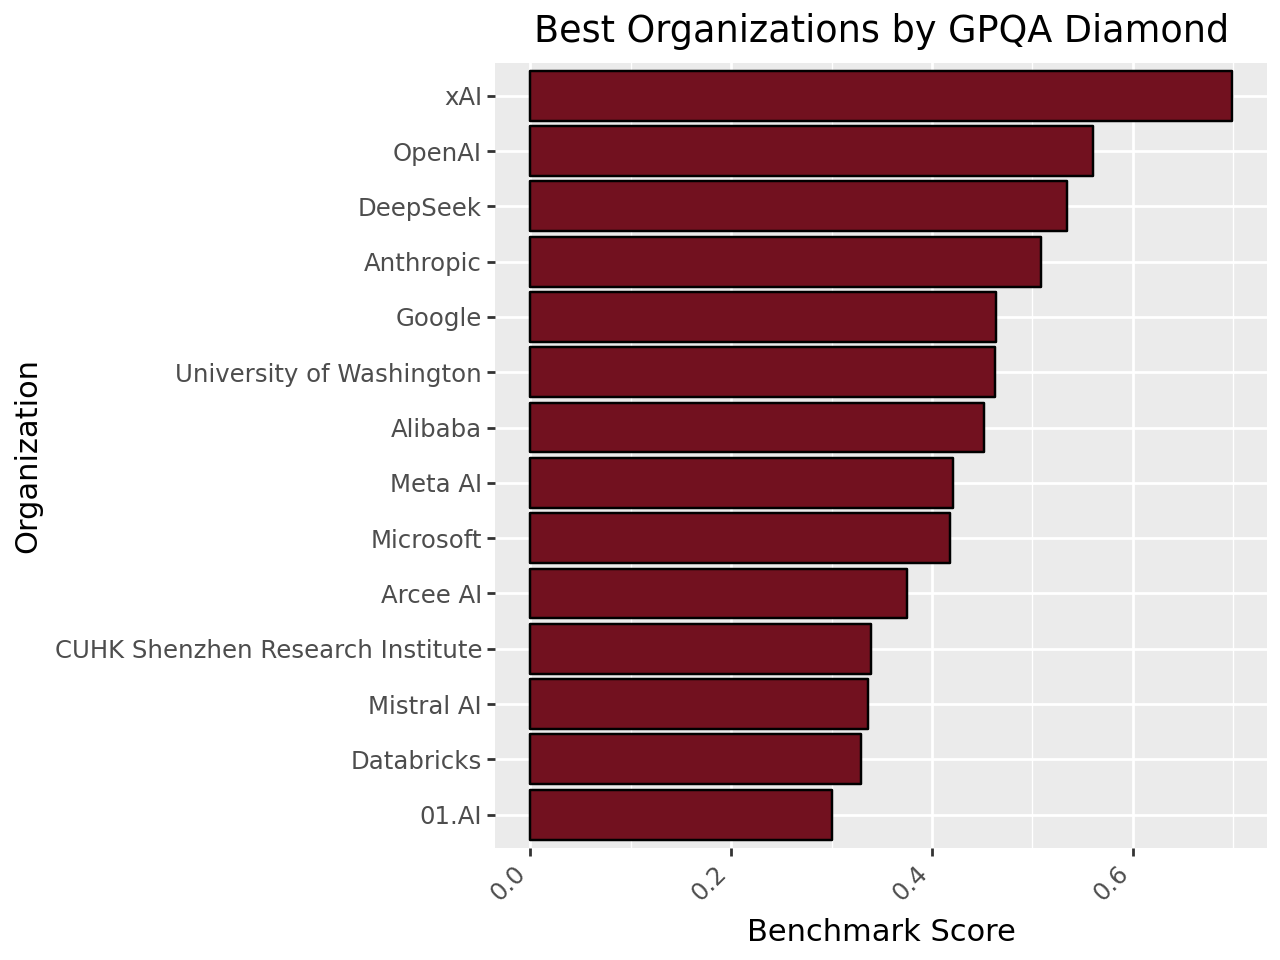

In [81]:
from plotnine import ggplot, aes, geom_bar, theme, element_text, coord_flip

ggplot(org_gpqa) + aes(x="Organization", y="Benchmark Score") + geom_bar(stat="identity", fill="#72111F", color="black") + theme(axis_text_x=element_text(angle=45, hjust=1)) + labs(title='Best Organizations by GPQA Diamond') + coord_flip()

xAI has a much higher score than the other organizations. The top 5 models includes one created by them, Grok-3. OpenAI takes the majority of models again. Google's Gemini 2.5 Pro posted an impresive 0.838 score, considering the average was 0.47. Through two tests, OpenAI is the organization to trust. Their models, o1, o3, and o4-mini can all be trusted with mathematical and science inquiries. 